In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd

def add_to_sys_path(relative_path):
    abs_path = os.path.abspath(os.path.join(os.getcwd(), relative_path))
    if abs_path not in sys.path:
        sys.path.append(abs_path)

add_to_sys_path(os.path.join('..', 'Utils'))

In [2]:
ecomdata = pd.read_csv('Fraudulent_online_shops_dataset.csv')
ecomdata['Label'] = ecomdata['Label'].replace({'fraudulent': 0, 'legitimate': 1})
ecomdata['Presence of free contact emails'] = ecomdata['Presence of free contact emails'].replace({2: 1, 3: 1})
ecomdata['Indication of young domain '] = ecomdata['Indication of young domain '].replace({2: 1})
ecomdata = ecomdata.drop(ecomdata.select_dtypes(include='object').columns, axis=1)
ecomdata['Label'].value_counts()

C:\Users\mmia43\AppData\Local\Temp\ipykernel_13056\2253636936.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ecomdata['Label'] = ecomdata['Label'].replace({'fraudulent': 0, 'legitimate': 1})


Label
0    579
1    561
Name: count, dtype: int64

In [3]:
#protected feature info
print('benign info')
print(ecomdata[ecomdata['Label']==1]['Indication of young domain '].value_counts())
print('malicious info')
print(ecomdata[ecomdata['Label']==0]['Indication of young domain '].value_counts())

benign info
Indication of young domain 
0    475
1     86
Name: count, dtype: int64
malicious info
Indication of young domain 
1    504
0     75
Name: count, dtype: int64


In [4]:
ecomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Label                                          1140 non-null   int64  
 1   Domain length                                  1140 non-null   int64  
 2   Top domain length                              1140 non-null   int64  
 3   Presence of prefix 'www'                       1140 non-null   int64  
 4   Number  of digits                              1140 non-null   int64  
 5   Number  of letters                             1140 non-null   int64  
 6   Number  of dots (.)                            1140 non-null   int64  
 7   Number  of hyphens (-)                         1140 non-null   int64  
 8   Presence of credit card payment                1140 non-null   int64  
 9   Presence of money back payment                 1140 

In [5]:
ecom_original_num_feature = ['Domain length', 'Top domain length', 'Number  of digits', 'Number  of letters', 'Number  of dots (.)','Number  of hyphens (-)', 'TrustPilot score', 'Tranco List rank']
len(ecom_original_num_feature)

8

In [6]:
phish_data = pd.read_csv('PhiUSIIL_Phishing_URL_Dataset.csv')
phish_data = phish_data.drop(phish_data.select_dtypes(include='object').columns, axis=1)
phish_data['label'].value_counts()

label
1    134850
0    100945
Name: count, dtype: int64

In [7]:
#protected feature info
print('benign info')
print(phish_data[phish_data['label']==1]['IsHTTPS'].value_counts())
print('malicious info')
print(phish_data[phish_data['label']==0]['IsHTTPS'].value_counts())

benign info
IsHTTPS
1    134850
Name: count, dtype: int64
malicious info
IsHTTPS
0    51256
1    49689
Name: count, dtype: int64


In [8]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 51 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   URLSimilarityIndex          235795 non-null  float64
 4   CharContinuationRate        235795 non-null  float64
 5   TLDLegitimateProb           235795 non-null  float64
 6   URLCharProb                 235795 non-null  float64
 7   TLDLength                   235795 non-null  int64  
 8   NoOfSubDomain               235795 non-null  int64  
 9   HasObfuscation              235795 non-null  int64  
 10  NoOfObfuscatedChar          235795 non-null  int64  
 11  ObfuscationRatio            235795 non-null  float64
 12  NoOfLettersInURL            235795 non-null  int64  
 13  LetterRatioInU

In [9]:
phish_original_cat_feature = ['IsDomainIP', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots','IsResponsive', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'pay', 'Crypto', 'HasCopyrightInfo']
len(phish_original_cat_feature)

16

In [10]:
ids_data = pd.read_csv('cybersecurity_intrusion_data.csv')
ids_data['protocol_type'] = ids_data['protocol_type'].replace({'ICMP': 0, 'TCP': 1, 'UDP': 2})
ids_data['encryption_used'] = ids_data['encryption_used'].replace({'AES': 0, 'DES': 1})
ids_data['attack_detected'] = ids_data['attack_detected'].replace({0: 1, 1: 0})
ids_data['encryption_used'] = ids_data['encryption_used'].fillna(0)
ids_data = ids_data.drop(ids_data.select_dtypes(include='object').columns, axis=1)
has_failed_logins = []
for i in ids_data['failed_logins']:
    if i:
        has_failed_logins.append(1)
    else:
        has_failed_logins.append(0)

ids_data['has_failed_logins'] = has_failed_logins
ids_data['attack_detected'].value_counts()

C:\Users\mmia43\AppData\Local\Temp\ipykernel_13056\2492963019.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ids_data['protocol_type'] = ids_data['protocol_type'].replace({'ICMP': 0, 'TCP': 1, 'UDP': 2})
C:\Users\mmia43\AppData\Local\Temp\ipykernel_13056\2492963019.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ids_data['encryption_used'] = ids_data['encryption_used'].replace({'AES': 0, 'DES': 1})


attack_detected
1    5273
0    4264
Name: count, dtype: int64

In [11]:
#protected feature info
print('benign info')
print(ids_data[ids_data['attack_detected']==1]['has_failed_logins'].value_counts())
print('malicious info')
print(ids_data[ids_data['attack_detected']==0]['has_failed_logins'].value_counts())

benign info
has_failed_logins
1    4231
0    1042
Name: count, dtype: int64
malicious info
has_failed_logins
1    3728
0     536
Name: count, dtype: int64


In [12]:
ids_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  9537 non-null   int64  
 1   protocol_type        9537 non-null   int64  
 2   login_attempts       9537 non-null   int64  
 3   session_duration     9537 non-null   float64
 4   encryption_used      9537 non-null   float64
 5   ip_reputation_score  9537 non-null   float64
 6   failed_logins        9537 non-null   int64  
 7   unusual_time_access  9537 non-null   int64  
 8   attack_detected      9537 non-null   int64  
 9   has_failed_logins    9537 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 745.2 KB


In [13]:
ids_original_cat_feature = ['protocol_type', 'encryption_used']
len(ids_original_cat_feature)

2

In [14]:
mal_data = pd.read_csv('Kaggle-data.csv')
mal_data = mal_data.drop(columns=['ID', 'Unnamed: 57'])
mal_data = mal_data.drop(mal_data.select_dtypes(include='object').columns, axis=1)
mal_data['legitimate'].value_counts()

C:\Users\mmia43\AppData\Local\Temp\ipykernel_13056\2763404031.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mal_data = pd.read_csv('Kaggle-data.csv')


legitimate
0    140849
1     75503
Name: count, dtype: int64

In [15]:
#protected feature info
print('benign info')
print(mal_data[mal_data['legitimate']==1]['Subsystem'].value_counts())
print('malicious info')
print(mal_data[mal_data['legitimate']==0]['Subsystem'].value_counts())

benign info
Subsystem
3     41732
2     31286
1      2370
16       58
9        57
Name: count, dtype: int64
malicious info
Subsystem
2    135280
3      5409
1       139
0        21
Name: count, dtype: int64


In [16]:
mal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216352 entries, 0 to 216351
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SizeOfOptionalHeader         216352 non-null  int64  
 1   Characteristics              216352 non-null  int64  
 2   MajorLinkerVersion           216351 non-null  float64
 3   MinorLinkerVersion           216352 non-null  int64  
 4   SizeOfCode                   216352 non-null  int64  
 5   SizeOfInitializedData        216352 non-null  int64  
 6   SizeOfUninitializedData      216352 non-null  int64  
 7   AddressOfEntryPoint          216352 non-null  int64  
 8   BaseOfCode                   216352 non-null  int64  
 9   BaseOfData                   216352 non-null  int64  
 10  ImageBase                    216352 non-null  float64
 11  SectionAlignment             216352 non-null  int64  
 12  FileAlignment                216352 non-null  int64  
 13 

In [17]:
len(mal_data['legitimate'].value_counts())

2

In [18]:
for i in mal_data.columns:
    if len(mal_data[i].value_counts())<10:
        print(i)

MajorSubsystemVersion
Subsystem
legitimate


In [19]:
mal_original_cat_feature = ['protocol_type', 'encryption_used']
len(mal_original_cat_feature)

2

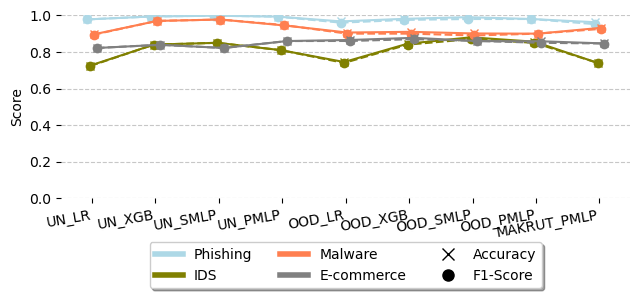

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_metrics(model_names, accuracy_scores, f1_scores, Malwareolors=None):
    """
    Plots the accuracy and F1-score of multiple models across different datasets.

    Args:
        model_names (list): A list of strings, where each string is the name of a model.
                            (Expected to be 9 model names)
        accuracy_scores (dict): A dictionary where keys are dataset names (str) and values
                                are lists of accuracy scores for each model in `model_names`.
                                Each list should have 9 accuracy scores.
        f1_scores (dict): A dictionary where keys are dataset names (str) and values
                          are lists of F1-scores for each model in `model_names`.
                          Each list should have 9 F1-scores.
        Malwareolors (dict, optional): A dictionary mapping dataset names to specific
                                         colors (e.g., {'Dataset1': 'blue', 'Dataset2': 'green'}).
                                         If None, default colors will be used.
    """
    num_models = len(model_names)
    if num_models != 9:
        print(f"Warning: Expected 9 model names, but got {num_models}. Plotting as is.")

    datasets = list(accuracy_scores.keys())
    num_datasets = len(datasets)

    if Malwareolors is None:
        # Default colors if not provided
        prop_cycle = plt.rcParams['axes.prop_cycle']
        colors = prop_cycle.by_key()['color']
        default_colors = {datasets[i]: colors[i % len(colors)] for i in range(num_datasets)}
        Malwareolors = default_colors
    else:
        # Validate provided colors
        for ds in datasets:
            if ds not in Malwareolors:
                raise ValueError(f"Color for dataset '{ds}' not provided in Malwareolors.")

    x = np.arange(num_models) # the label locations for models

    plt.figure(figsize=(6.5, 3.64))
    ax = plt.gca() # Get the current axes

    # --- REMOVE THE BLACK BORDER ---
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    # --- END BORDER REMOVAL ---

    # To collect handles for the legend
    line_handles = []

    # Plot for each dataset
    for i, dataset_name in enumerate(datasets):
        acc = accuracy_scores[dataset_name]
        f1 = f1_scores[dataset_name]
        color = Malwareolors[dataset_name]

        # Plot Accuracy with 'x' marker
        acc_line, = plt.plot(x + (i * 0.05 - (num_datasets - 1) * 0.025), # Small offset for visibility
                 acc,
                 marker='x', linestyle='-', color=color)

        # Plot F1-Score with 'o' marker
        f1_line, = plt.plot(x + (i * 0.05 - (num_datasets - 1) * 0.025), # Same offset
                 f1,
                 marker='o', linestyle='--', color=color)

        # Collect handles for the legend for each dataset's color
        if not any(h.get_label() == dataset_name for h in line_handles):
             line_handles.append(plt.Line2D([0], [0], color=color, lw=4, label=dataset_name))


    # Add handles for Accuracy ('x') and F1-Score ('o') markers
    line_handles.append(plt.Line2D([0], [0], marker='x', color='black', linestyle='None', markersize=8, label='Accuracy'))
    line_handles.append(plt.Line2D([0], [0], marker='o', color='black', linestyle='None', markersize=8, label='F1-Score'))


    plt.ylabel('Score')
    plt.xticks(x, model_names, rotation=10, ha='right') # Rotate model names for readability
    plt.ylim(0, 1) # Scores are typically between 0 and 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Place legend at the bottom and arrange in two columns
    # Set ncol to 3 to get 2 rows (4 datasets + 2 markers = 6 items; 6/2 = 3 columns)
    plt.legend(handles=line_handles, loc='upper center', bbox_to_anchor=(0.5, -0.2),
               fancybox=True, shadow=True, ncol=3) # Changed ncol from (num_datasets + 2) to 3
    plt.tight_layout(rect=[0, 0.1, 1, 1]) # Adjust layout to make space for the legend at the bottom
    plt.show()

# --- Demo Arrays (same as before) ---
demo_model_names = ['UN_LR', 'UN_XGB', 'UN_SMLP','UN_PMLP', 'OOD_LR', 'OOD_XGB', 'OOD_SMLP','OOD_PMLP', 'MAKRUT_PMLP']

demo_accuracy_scores = {
    'Phishing': [0.9778, 0.9936, 0.9981, 0.9931, 0.9670, 0.9810, 0.99, 0.98, 0.9625],
    'IDS': [0.726, 0.84, 0.85, 0.81, 0.745, 0.845, 0.88, 0.856, 0.74],
    'Malware': [0.8961, 0.9695, 0.9772, 0.945, 0.9061, 0.91, 0.901, 0.90, 0.9318],
    'E-commerce': [0.8216, 0.8392, 0.8216, 0.8596, 0.8655, 0.8772, 0.8596, 0.8584, 0.8465]
}

demo_f1_scores = {
    'Phishing': [0.9778, 0.9936, 0.9981, 0.9931, 0.96, 0.975, 0.980, 0.98, 0.952],
    'IDS': [0.7236, 0.84, 0.85, 0.81, 0.74, 0.84, 0.87, 0.85, 0.74],
    'Malware': [0.8942, 0.9695, 0.9772, 0.947, 0.90, 0.90, 0.89, 0.90, 0.9259],
    'E-commerce': [0.8218, 0.839, 0.8216, 0.8596, 0.86, 0.87, 0.86, 0.85, 0.8461]
}

# Define specific colors for datasets
custom_colors = {
    'Phishing': 'lightblue',
    'IDS': 'olive',
    'Malware': 'coral',
    'E-commerce': 'grey'
}

# --- Call the function with demo data ---
plot_model_metrics(demo_model_names, demo_accuracy_scores, demo_f1_scores, Malwareolors=custom_colors)